Text(0.5, 0, '(Test) Experimental DFT321')

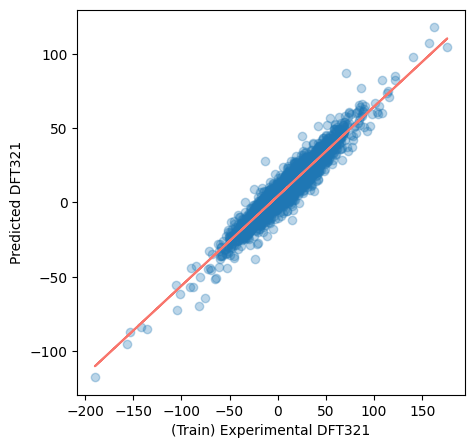

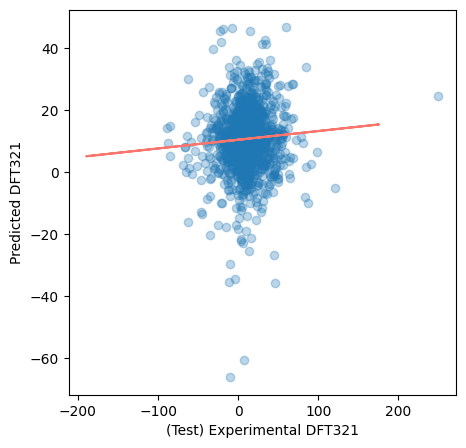

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load the dataset
url = 'https://raw.githubusercontent.com/AayzStha37/GEMLabHCIResearch/main/Unity%20based%20texture%20CSVs/MOD%20Wooden%20Floor_extracted_values_with_DFT321_without_duplicates.csv'
df = pd.read_csv(url)

# Separate features and target variable
y = df['DFT321']
x = df.drop('DFT321', axis=1)

# Identify categorical columns
# categorical_cols = ['TEXTURE']  # Assuming 'TEXTURE' is the categorical column

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# # Preprocessing categorical columns using One-Hot Encoding
# preprocessor = ColumnTransformer(
#     transformers=[('cat', OneHotEncoder(), categorical_cols)],
#     remainder='passthrough'
# )

# x_train_processed = preprocessor.fit_transform(x_train)
# x_test_processed = preprocessor.transform(x_test)

# Training the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

# Training the Random Forest model
rf = RandomForestRegressor(max_depth=32, random_state=42)
rf.fit(x_train,y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)



# --------RF----------

## MODEL PERFOEMANCE VISUALIZATION

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred,alpha =0.3)

z= np.polyfit(y_train, y_rf_train_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('(Train) Experimental DFT321')

## MODEL PERFOEMANCE VISUALIZATION

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_rf_test_pred,alpha =0.3)

z= np.polyfit(y_test, y_rf_test_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('(Test) Experimental DFT321')





# --------LR----------

## MODEL PERFOEMANCE VISUALIZATION

# plt.figure(figsize=(5,5))
# plt.scatter(x=y_train, y=y_lr_train_pred,alpha =0.3)

# z= np.polyfit(y_train, y_lr_train_pred,1)
# p =np.poly1d(z)

# plt.plot(y_train,p(y_train),'#f8766d')
# plt.ylabel('Predicted DFT321')
# plt.xlabel('Experimental DFT321')

# ## MODEL PERFOEMANCE VISUALIZATION

# plt.figure(figsize=(5,5))
# plt.scatter(x=y_test, y=y_lr_test_pred,alpha =0.3)

# z= np.polyfit(y_test, y_lr_test_pred,1)
# p =np.poly1d(z)

# plt.plot(y_train,p(y_train),'#f8766d')
# plt.ylabel('Predicted DFT321')
# plt.xlabel('Experimental DFT321')